In [7]:
import cv2
import os

# Define the directory containing the .jpg files and a dictionary for the training dataset
image_dir = "Dataset"
training_data = {}

# Loop through the image directory
for root, dirs, files in os.walk(image_dir):
    for file in files:
        if file.endswith(".jpg"):
            image_path = os.path.join(root, file)
            label = os.path.basename(root)  # Use the directory name as the label

            if label not in training_data:
                training_data[label] = []  # Initialize an empty list for the label

            img = cv2.imread(image_path)
            training_data[label].append(img)

# Now, `training_data` is a dictionary where keys are labels (corresponding to directory names)
# and values are lists of face data (image arrays) for each label.
print("Dictionary created succesfully")

Dictionary created succesfully


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


X = []  # List to store image data
y = []  # List to store corresponding labels

for label, image_list in training_data.items():
    for image in image_list:
        X.append(image)
        y.append(label)

X = np.array(X)
y = np.array(y)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)
print("Labels created")

Labels created


In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200,200,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

print("model created")



model created


In [11]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X,y_encoded,epochs=20,batch_size=32)   
print("model trained")


Epoch 1/20


1/1 [==============================] - 5s 5s/step - loss: 14.8843 - accuracy: 0.0345
Epoch 2/20
1/1 [==============================] - 1s 930ms/step - loss: 982.7185 - accuracy: 0.2069
Epoch 3/20
1/1 [==============================] - 1s 872ms/step - loss: 241.9477 - accuracy: 0.0690
Epoch 4/20
1/1 [==============================] - 1s 838ms/step - loss: 258.0010 - accuracy: 0.0345
Epoch 5/20
1/1 [==============================] - 1s 889ms/step - loss: 88.9130 - accuracy: 0.0345
Epoch 6/20
1/1 [==============================] - 1s 922ms/step - loss: 20.6882 - accuracy: 0.1724
Epoch 7/20
1/1 [==============================] - 1s 890ms/step - loss: 1.9491 - accuracy: 0.6552
Epoch 8/20
1/1 [==============================] - 1s 889ms/step - loss: 4.0664 - accuracy: 0.4828
Epoch 9/20
1/1 [==============================] - 1s 928ms/step - loss: 0.9945 - accuracy: 0.5172
Epoch 10/20
1/1 [==============================] - 1s 1s/step - loss: 0.8439 - accuracy: 0.5172
Epoch 11/20
1

In [12]:
import xlwt;
from datetime import datetime;
from xlrd import open_workbook;
from xlwt import Workbook;
from xlutils.copy import copy
from pathlib import Path

'''style0 = xlwt.easyxf('font: name Times New Roman, color-index red, bold on',
    num_format_str='#,##0.00')
style1 = xlwt.easyxf(num_format_str='D-MMM-YY')

wb = xlwt.Workbook()
ws = wb.add_sheet('A Test Sheet')

ws.write(0, 0, 1234.56, style0)
ws.write(1, 0, datetime.now(), style1)
ws.write(2, 0, 1)
ws.write(2, 1, 1)
ws.write(2, 2, xlwt.Formula("A3+B3"))

wb.save('example.xls')
'''

def output(filename, sheet, present_students):
    my_file = Path(f'Report/{filename}{datetime.now().date()}.xls')

    if my_file.is_file():
        rb = open_workbook(f'Report/{filename}{datetime.now().date()}.xls')
        book = copy(rb)
        sh = book.get_sheet(0)
    else:
        book = xlwt.Workbook()
        sh = book.add_sheet(sheet)

        # Set up styles
        style0 = xlwt.easyxf('font: name Times New Roman, color-index red, bold on',
                             num_format_str='#,##0.00')
        style1 = xlwt.easyxf(num_format_str='D-MMM-YY')

        # Write header
        sh.write(0, 0, datetime.now().date(), style1)
        sh.write(1, 0, 'Name', style0)
        sh.write(1, 1, 'Present', style0)

    # Write present students to the sheet
    for i, student in enumerate(present_students):
        sh.write(i + 2, 0, student)
        sh.write(i + 2, 1, 'Present')

    # Save the workbook
    fullname = f'{filename}{datetime.now().date()}.xls'
    book.save(f'Report/{fullname}')
    return fullname




1/1 [==============================] - 0s 66ms/step


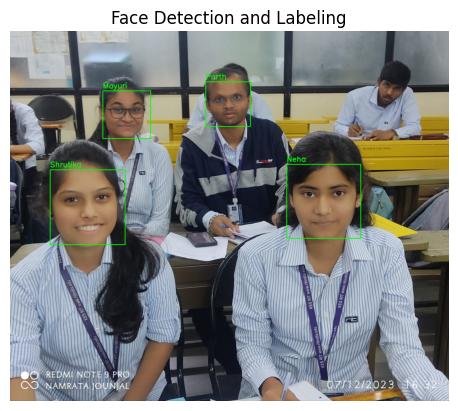

1/1 [==============================] - 0s 73ms/step


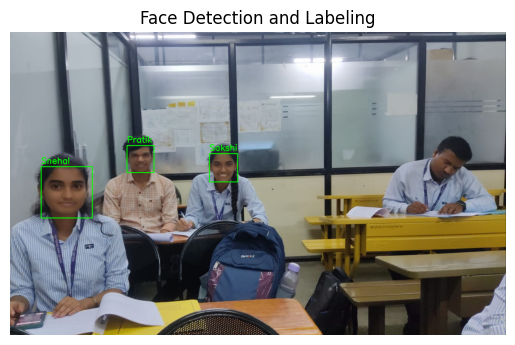

Attendance:
Parth: Present
Mayuri: Present
Neha: Present
Shrutika: Present
Sakshi: Present
Pratik: Present
Snehal: Present


In [13]:
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the pre-trained face classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def crop_faces(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
    
    # Crop and save each face
    cropped_faces = []
    bounding_boxes = []
    for i, (x, y, w, h) in enumerate(faces):
        face = img[y:y+h, x:x+w]
        face = cv2.resize(face, (200, 200))
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        cropped_faces.append(face)
        bounding_boxes.append((x, y, w, h))
    
    return cropped_faces, bounding_boxes

def predict_and_label(cropped_faces):
    # Make predictions for each cropped face
    predicted_labels = []
    for face in cropped_faces:
        # If the image is grayscale, convert to RGB
        if len(face.shape) == 2:
            face = cv2.cvtColor(face, cv2.COLOR_GRAY2RGB)
        
        # Resize the image to match the input size expected by the model
        face = cv2.resize(face, (200, 200))
        
        img_array = np.expand_dims(face, axis=0)
        img_array = img_array / 255.0
        def get_actual_label(label_index):
            return label_encoder.inverse_transform([label_index])[0]
        predictions = model.predict(img_array)
        predicted_label = [np.argmax(predictions[0])]
        predicted_labels.append(get_actual_label(predicted_label[0]))

    return predicted_labels

def display_results(img, bounding_boxes, predicted_labels):
    # Display the original image
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display bounding boxes and labels
    for (x, y, w, h), label in zip(bounding_boxes, predicted_labels):
        color = (0, 255, 0)  # Green color for bounding box
        cv2.rectangle(img_rgb, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img_rgb, str(label), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    # Display the image with bounding boxes and labels
    plt.imshow(img_rgb)
    plt.title("Face Detection and Labeling")
    plt.axis('off')
    plt.show()

def mark_attendance(predicted_labels, attendance_dict):
    for label in predicted_labels:
        if label not in attendance_dict:
            attendance_dict[label] = 'Present'
    output('attendance','class1',attendance_dict)         

def process_images_in_folder(folder_path):
    attendance_dict = {}  # Dictionary to store attendance information

    for file_name in os.listdir(folder_path):
        if file_name.endswith(('.jpg', '.jpeg', '.png','.JPG')):  # Adjust file extensions as needed
            image_path = os.path.join(folder_path, file_name)
            img = cv2.imread(image_path)
            
            cropped_faces, bounding_boxes = crop_faces(img)
            predicted_labels = predict_and_label(cropped_faces)
            mark_attendance(predicted_labels, attendance_dict)

            # Display the results for each image
            display_results(img, bounding_boxes, predicted_labels)

    # Print the final attendance information
    print("Attendance:")
    for label, status in attendance_dict.items():
        print(f"{label}: {status}")

# Example usage with a folder containing multiple images
folder_path = "Test"
process_images_in_folder(folder_path)
